### TensorFlow / Keras
TensorFlow와 Keras는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리입니다.  

TensorFlow와 Keras는 모두 2015년에 릴리즈 되었습니다 (Keras는 2015년 3월, TensorFlow는 2015년 11월). 이는 딥러닝 세계의 관점에서 볼 때, 꽤 오랜시간이라고 볼 수 있습니다.  

Keras는 사용자가 TensorFlow를 좀 더 쉽고 편하게 사용할 수 있게 해주는 high level API를 제공합니다.  

TensorFlow 2.x에서는 Keras를 딥러닝의 공식 API로 채택하였고, Keras는 TensorFlow 내의 하나의 framwork으로 개발되고 있습니다.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [8]:
# MNIST dataset download

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
# Model 생성, compile

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Training / Evaluation
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2880 - accuracy: 0.9159
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1392 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1035 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0821 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0695 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0574 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0519 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0466 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0418 - accuracy: 0.9860
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0702

[0.07021433115005493, 0.9790000319480896]

In [11]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

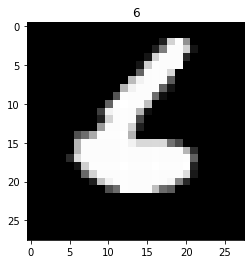

In [12]:
plt.imshow(image ,cmap = 'gray')
plt.title(y_train[idx])
plt.show()

### Tensor
Tensor는 multi-dimensional array를 나타내는 말로, TensorFlow의 기본 data type입니다

In [14]:
h = tf.constant([3, 3] , dtype = tf.float32)
print(h)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [15]:
# 상수형

x = tf.constant([[1., 2.],
                 [3. ,4.]])

print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [16]:
# numpy ndarray나 python의 list도 tensor로 변환

x_np = np.array([[1.0, 2.0],
                [3.0, 4.0]])
x_list = [[1.0, 2.0], 
         [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [17]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [18]:
# 반대로 tensor를 다음과 같이 numpy ndarray로 변환
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [19]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,2), 2 # 2행 3열를 2로 채움
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [20]:
d = tf.zeros_like(c) # Type까지 같이 가져옴
e = tf.ones_like(c)
print(d)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [21]:
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [22]:
g  = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [23]:
h = tf.random.uniform((2,2)) # np.rand
i = tf.random.normal((2,2))  # np.randn
print(h)
print(i)

tf.Tensor(
[[0.21062899 0.7860651 ]
 [0.01658571 0.11916101]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.26473606 -1.2008462 ]
 [-1.3137121  -1.1270314 ]], shape=(2, 2), dtype=float32)


### Tensor의 속성

In [24]:
tensor = tf.random.normal((3,4))

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (3, 4)
Datatype of tensor: <dtype: 'float32'>


In [25]:
# 속성 변경
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")

Shape of tensor: (4, 3)
Datatype of tensor: <dtype: 'int32'>


### Variable
Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서입니다. 딥러닝에서는 학습해야하는 가중치(weight, bias)들을 variable로 생성합니다.  

텐서는 변수 값 생성 후 값 변경 불가능 (튜플과 비슷)

In [43]:
# 초기값을 사용해서 Variable을 생성할 수 있습니다
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.2138887 ,  1.4788071 ],
       [ 2.057892  ,  0.95082927]], dtype=float32)>


In [44]:
# 아래와 같이 variable을 초기화해주는 initializer들을 사용할 수도 있습니다
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.4030257 , -1.5241718 ],
       [-0.27372634,  0.84602445]], dtype=float32)>


In [45]:
# variable은 `.assign(value)`, `.assign_add(increment)`, 또는 `.assign_sub(decrement)`
# 와 같은 메소드를 사용해서 Variable의 값을 갱신합니다:'''

new_value = tf.random.normal(shape=(2,2))
print(new_value)
weight.assign(new_value)
print(weight)

tf.Tensor(
[[ 0.30648315  0.49426848]
 [ 0.14018448 -0.17169906]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.30648315,  0.49426848],
       [ 0.14018448, -0.17169906]], dtype=float32)>


In [46]:
added_value = tf.ones(shape=(2,2))
weight.assign_sub(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.69351685, -0.5057315 ],
       [-0.85981554, -1.171699  ]], dtype=float32)>


### Indexing과 Slicing

In [47]:
a = tf.range(1, 13)
a = tf.reshape(a, (3, 4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [48]:
# indexing
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [49]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### Transpose

In [55]:
a = tf.range(16)

a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [51]:
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### Tensor 연산

In [53]:
x = tf.constant([[1,2], [3,4]], dtype=tf.float32)
y = tf.constant([[5,6], [7,8]], dtype=tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [56]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.divide(x, y))
print(tf.matmul(x, y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857146 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857146 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [57]:
z = tf.range(1, 11)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [58]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [59]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [60]:
concat = tf.concat([z, z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [61]:
concat = tf.concat([z, z], axis=-1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [62]:
stack = tf.stack([z, z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [63]:
stack = tf.stack([z, z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [64]:
stack = tf.stack([z, z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


### Dataset
Data를 처리하여 model에 공급하기 위하여 TensorFlow에서는 tf.data.Dataset을 사용합니다.

In [65]:
mnist = keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [66]:
# train_images, train_labels의 shape 확인
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [67]:
# test_images, test_labels의 shape 확인
print(test_images.shape, test_labels.shape)

(10000, 28, 28) (10000,)


In [68]:
type(train_images)

numpy.ndarray

In [69]:
# training set의 각 class 별 image 수 확인
unique, counts = np.unique(train_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [70]:
# test set의 각 class 별 image 수 확인
unique, counts = np.unique(test_labels, axis=-1, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

### Data 시각화하기

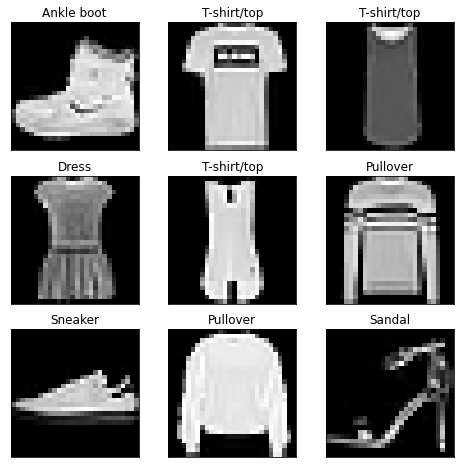

In [71]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()